In [1]:
import uproot
import awkward as ak
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from read_lhe_uproot import *
mpl.rcParams.update(
    {'font.size': 18,
     'font.family': 'sans-serif',
     'legend.fontsize': 14,
     'axes.labelsize': 22,
     'axes.labelpad': 8.0,
     'xtick.labelsize': 14,
     'ytick.labelsize': 14
    }
    )

In [2]:
df = read_lhe_uproot('protons100M/Events/run_01/unweighted_events.root')
#df = df.append(read_lhe_uproot('protons100M/Events/run_02/unweighted_events.root')) #repetir para os outros
df

['Event', 'Event/Event.fUniqueID', 'Event/Event.fBits', 'Event/Event.Number', 'Event/Event.Nparticles', 'Event/Event.ProcessID', 'Event/Event.Weight', 'Event/Event.ScalePDF', 'Event/Event.CouplingQED', 'Event/Event.CouplingQCD', 'Event_size', 'Rwgt', 'Rwgt/Rwgt.fUniqueID', 'Rwgt/Rwgt.fBits', 'Rwgt/Rwgt.Weight', 'Rwgt_size', 'Particle', 'Particle/Particle.fUniqueID', 'Particle/Particle.fBits', 'Particle/Particle.PID', 'Particle/Particle.Status', 'Particle/Particle.Mother1', 'Particle/Particle.Mother2', 'Particle/Particle.ColorLine1', 'Particle/Particle.ColorLine2', 'Particle/Particle.Px', 'Particle/Particle.Py', 'Particle/Particle.Pz', 'Particle/Particle.E', 'Particle/Particle.M', 'Particle/Particle.PT', 'Particle/Particle.Eta', 'Particle/Particle.Phi', 'Particle/Particle.Rapidity', 'Particle/Particle.LifeTime', 'Particle/Particle.Spin', 'Particle_size']
Number of events: 1000000


,PID,Status,Mother1,Mother2,ColorLine1,ColorLine2,Px,Py,Pz,E,M,PT,Eta,Phi,Rapidity,LifeTime,Spin,event
event,,,,,,,,,,,,,,,,,,
1,2,-1,-1,-1,503,0,-0.000000,0.000000,975.369702,975.369702,0.0,0.000000,999.900000,0.000000,999.900000,0.0,1.0,1
1,21,-1,-1,-1,501,502,0.000000,-0.000000,-15.780468,15.780468,0.0,0.000000,-999.900000,0.000000,-999.900000,0.0,1.0,1
1,21,1,0,1,503,502,89.124315,50.345449,759.809886,766.673901,0.0,102.361163,2.702215,0.514203,2.702215,0.0,1.0,1
1,2,1,0,1,501,0,-89.124315,-50.345449,199.779348,224.476269,0.0,102.361163,1.421829,-2.627389,1.421829,0.0,1.0,1
2,21,-1,-1,-1,503,502,0.000000,0.000000,1194.542338,1194.542338,0.0,0.000000,999.900000,0.000000,999.900000,0.0,-1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999999,2,1,0,1,501,0,-107.826597,-42.624363,-805.079207,813.385482,0.0,115.945726,-2.636111,-2.765140,-2.636111,0.0,1.0,999999
1000000,1,-1,-1,-1,502,0,-0.000000,0.000000,140.071222,140.071222,0.0,0.000000,999.900000,0.000000,999.900000,0.0,-1.0,1000000
1000000,21,-1,-1,-1,503,502,0.000000,-0.000000,-84.314432,84.314432,0.0,0.000000,-999.900000,0.000000,-999.900000,0.0,1.0,1000000


In [3]:
# Todos os Jatos
selection = ((df.Status == 1))

df_sel = df [selection]
df_sel.head(10)

#pd.set_option('display.max_rows', None) # expandindo para visualização máxima do número de linhas
#df_sel # tabela específica para expandir

,PID,Status,Mother1,Mother2,ColorLine1,ColorLine2,Px,Py,Pz,E,M,PT,Eta,Phi,Rapidity,LifeTime,Spin,event
event,,,,,,,,,,,,,,,,,,
1,21,1,0,1,503,502,89.124315,50.345449,759.809886,766.673901,0.0,102.361163,2.702215,0.514203,2.702215,0.0,1.0,1
1,2,1,0,1,501,0,-89.124315,-50.345449,199.779348,224.476269,0.0,102.361163,1.421829,-2.627389,1.421829,0.0,1.0,1
2,21,1,0,1,503,501,-51.083441,93.302892,1186.408310,1191.167337,0.0,106.371742,3.106897,2.071719,3.106897,0.0,-1.0,2
2,1,1,0,1,501,0,51.083441,-93.302892,-485.813767,497.322796,0.0,106.371742,-2.223808,-1.069874,-2.223808,0.0,1.0,2
3,21,1,0,1,503,501,-41.327181,-103.378000,-863.465787,870.613641,0.0,111.332596,-2.745710,-1.951102,-2.745710,0.0,-1.0,3
3,2,1,0,1,501,0,41.327181,103.378000,265.732906,288.112694,0.0,111.332596,1.604364,1.190490,1.604364,0.0,-1.0,3
4,2,1,0,1,501,0,132.064533,-64.066598,211.869996,257.748841,0.0,146.784093,1.162959,-0.451670,1.162959,0.0,-1.0,4
4,-2,1,0,1,0,503,-132.064533,64.066598,110.067917,183.468025,0.0,146.784093,0.693037,2.689923,0.693037,0.0,1.0,4
5,21,1,0,1,503,502,13.506198,110.499025,170.367406,203.512911,0.0,111.321390,1.211514,1.449171,1.211514,0.0,1.0,5


In [4]:
( np.abs( df['Rapidity'] ) >= 1.0 )

event
1           True
1           True
1           True
1           True
2           True
           ...  
999999      True
1000000     True
1000000     True
1000000    False
1000000    False
Name: Rapidity, Length: 4000000, dtype: bool

In [5]:
def select_data( df, y_min, y_max ):
    msk_sel = ( np.abs( df['Rapidity'] ) >= y_min ) & ( np.abs( df['Rapidity'] ) < y_max )
    return df[ msk_sel ]

df_sel_ybin1 = select_data( df_sel, y_min=0., y_max=0.5 )
df_sel_ybin2 = select_data( df_sel, y_min=0.5, y_max=1.0 )
df_sel_ybin3 = select_data( df_sel, y_min=1.0, y_max=1.5 )
df_sel_ybin4 = select_data( df_sel, y_min=1.5, y_max=2.0 )
df_sel_all = {
    'ybin1': df_sel_ybin1,
    'ybin2': df_sel_ybin2,
    'ybin3': df_sel_ybin3,
    'ybin4': df_sel_ybin4
}


In [6]:
df_sel_all[ "ybin2" ]

,PID,Status,Mother1,Mother2,ColorLine1,ColorLine2,Px,Py,Pz,E,M,PT,Eta,Phi,Rapidity,LifeTime,Spin,event
event,,,,,,,,,,,,,,,,,,
4,-2,1,0,1,0,503,-132.064533,64.066598,110.067917,183.468025,0.0,146.784093,0.693037,2.689923,0.693037,0.0,1.0,4
6,21,1,0,1,503,501,-112.619098,-56.735558,-93.535912,157.006215,0.0,126.103072,-0.686527,-2.674923,-0.686527,0.0,1.0,6
13,21,1,0,1,504,501,67.437518,74.780649,96.852023,139.714991,0.0,100.697390,0.854112,0.836985,0.854112,0.0,-1.0,13
15,-3,1,0,1,0,502,214.650982,112.454976,259.542396,355.082273,0.0,242.324505,0.930734,0.482582,0.930734,0.0,-1.0,15
20,21,1,0,1,504,502,24.147448,-107.571918,-80.045749,136.242940,0.0,110.248885,-0.673874,-1.349980,-0.673874,0.0,-1.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999990,21,1,0,1,503,502,105.079940,-3.814828,-117.124699,157.399307,0.0,105.149165,-0.959659,-0.036288,-0.959659,0.0,-1.0,999990
999995,2,1,0,1,501,0,-34.624566,-214.041576,-208.196165,300.596573,0.0,216.824023,-0.852955,-1.731173,-0.852955,0.0,-1.0,999995
999996,21,1,0,1,503,501,73.276249,-72.679458,86.087820,134.398010,0.0,103.207133,0.759095,-0.781309,0.759095,0.0,1.0,999996


In [7]:
bins_pt = np.array(
    [  97. ,  133. ,  174. ,  220. ,  272. ,  330. ,  395. ,  468. ,  548. ,  638. ,  737. , 846. ,
      967. , 1101. , 1248. , 1410. , 1588. , 1784. , 2000. , 2238. , 2500. , 2787. , 3103. ] )
bins_pt

array([  97.,  133.,  174.,  220.,  272.,  330.,  395.,  468.,  548.,
        638.,  737.,  846.,  967., 1101., 1248., 1410., 1588., 1784.,
       2000., 2238., 2500., 2787., 3103.])

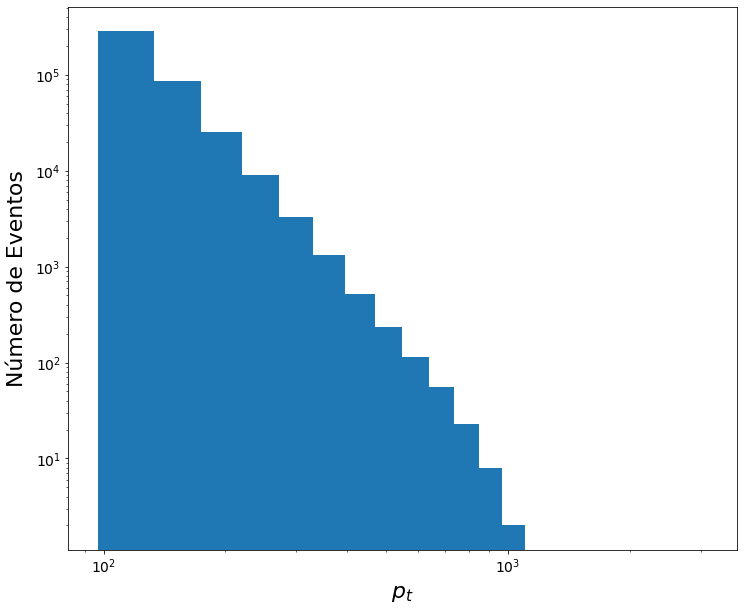

In [8]:
#fig = plt.figure (figsize=(12,10))

#plt.hist( df_sel_all[ 'ybin1' ][ 'PT' ], histtype='step', bins=bins_pt )
#plt.xlabel('$p_t$')
#plt.ylabel('Número de jatos')
#plt.xscale( 'log' )
#plt.yscale( 'log' )

fig = plt.figure(figsize=(12, 10))

plt.hist(df_sel_all['ybin1']['PT'], histtype='stepfilled', bins=bins_pt)
plt.xlabel('$p_t$')
plt.ylabel('Número de Eventos')
plt.xscale('log')
plt.yscale('log')

plt.show()



In [9]:
# Número de eventos

# index_nonduplicated = df_sel.index[ ( ~df_sel.index.duplicated() ) ]
# print( index_nonduplicated )
# n_events = index_nonduplicated.size
# print( n_events )

n_events = 5000000
cross_section = 1.258e+06 #fazer a média ponderada (peso é o inverso do erro ao quadrado)
ybin_width = 0.5
for key in df_sel_all:
    df_ = df_sel_all[ key ]
    df_.loc[ :, 'norm' ] = ( ( cross_section / n_events ) / ybin_width )

/home/maressa/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [10]:
df_sel_all[ 'ybin2' ]

,PID,Status,Mother1,Mother2,ColorLine1,ColorLine2,Px,Py,Pz,E,M,PT,Eta,Phi,Rapidity,LifeTime,Spin,event,norm
event,,,,,,,,,,,,,,,,,,,
4,-2,1,0,1,0,503,-132.064533,64.066598,110.067917,183.468025,0.0,146.784093,0.693037,2.689923,0.693037,0.0,1.0,4,0.5032
6,21,1,0,1,503,501,-112.619098,-56.735558,-93.535912,157.006215,0.0,126.103072,-0.686527,-2.674923,-0.686527,0.0,1.0,6,0.5032
13,21,1,0,1,504,501,67.437518,74.780649,96.852023,139.714991,0.0,100.697390,0.854112,0.836985,0.854112,0.0,-1.0,13,0.5032
15,-3,1,0,1,0,502,214.650982,112.454976,259.542396,355.082273,0.0,242.324505,0.930734,0.482582,0.930734,0.0,-1.0,15,0.5032
20,21,1,0,1,504,502,24.147448,-107.571918,-80.045749,136.242940,0.0,110.248885,-0.673874,-1.349980,-0.673874,0.0,-1.0,20,0.5032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999990,21,1,0,1,503,502,105.079940,-3.814828,-117.124699,157.399307,0.0,105.149165,-0.959659,-0.036288,-0.959659,0.0,-1.0,999990,0.5032
999995,2,1,0,1,501,0,-34.624566,-214.041576,-208.196165,300.596573,0.0,216.824023,-0.852955,-1.731173,-0.852955,0.0,-1.0,999995,0.5032
999996,21,1,0,1,503,501,73.276249,-72.679458,86.087820,134.398010,0.0,103.207133,0.759095,-0.781309,0.759095,0.0,1.0,999996,0.5032


[ 36.  41.  46.  52.  58.  65.  73.  80.  90.  99. 109. 121. 134. 147.
 162. 178. 196. 216. 238. 262. 287. 316.]
[ 115.   153.5  197.   246.   301.   362.5  431.5  508.   593.   687.5
  791.5  906.5 1034.  1174.5 1329.  1499.  1686.  1892.  2119.  2369.
 2643.5 2945. ]
[1.42900246e+05 4.34578616e+04 1.28663208e+04 4.52427120e+03
 1.67062400e+03 6.59192000e+02 2.62670400e+02 1.17245600e+02
 5.73648000e+01 2.76760000e+01 1.15736000e+01 4.02560000e+00
 1.00640000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[  97.  133.  174.  220.  272.  330.  395.  468.  548.  638.  737.  846.
  967. 1101. 1248. 1410. 1588. 1784. 2000. 2238. 2500. 2787. 3103.]
[3.96945127e+03 1.05994784e+03 2.79702626e+02 8.70052154e+01
 2.88038621e+01 1.01414154e+01 3.59822466e+00 1.46557000e+00
 6.37386667e-01 2.79555556e-01 1.06179817e-01 3.32694215e-02
 7.51044776e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000

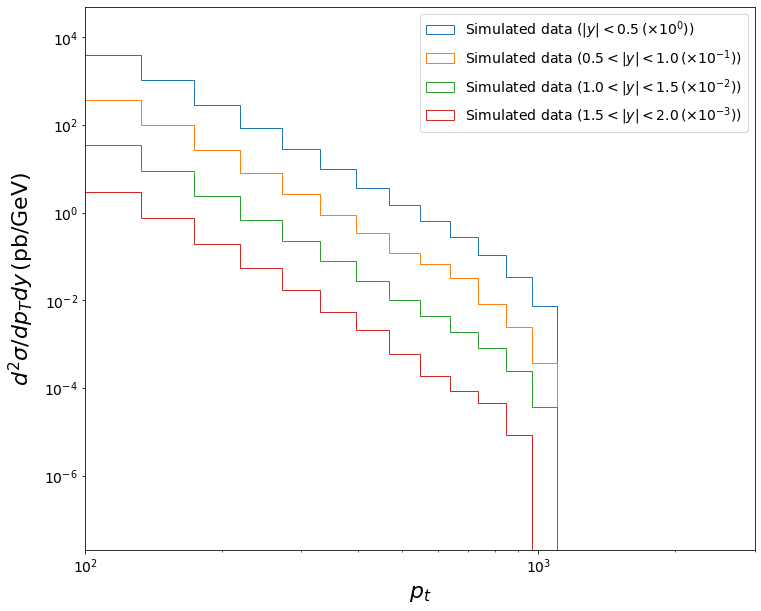

In [11]:
# Histograma normalizado

bin_widths_pt = ( bins_pt[1:] - bins_pt[:-1] )
print ( bin_widths_pt )

bin_centers_pt = (  bins_pt[1:] + bins_pt[:-1] ) / 2
print ( bin_centers_pt )

factors = {
    'ybin1': 1e+00,
    'ybin2': 1e-01,
    'ybin3': 1e-02,
    'ybin4': 1e-03
}

labels = {
    'ybin1': r"Simulated data ($|y| < 0.5 \,(\times 10^0)$)",
    'ybin2': r"Simulated data ($0.5 < |y| < 1.0 \,(\times 10^{-1})$)",
    'ybin3': r"Simulated data ($1.0 < |y| < 1.5 \,(\times 10^{-2})$)",
    'ybin4': r"Simulated data ($1.5 < |y| < 2.0 \,(\times 10^{-3})$)"
}

fig = plt.figure (figsize=(12,10))

for key in df_sel_all:
    sum_weights, bins_ = np.histogram( df_sel_all[ key ][ 'PT' ], bins=bins_pt, weights=df_sel_all[ key ][ 'norm' ] )
    print ( sum_weights )
    print ( bins_ )

    sum_weights_corr = ( sum_weights / bin_widths_pt ) * factors[ key ]
    print ( sum_weights_corr )

    # plt.errorbar( bin_centers_pt, sum_weights_corr )
    plt.hist( bin_centers_pt, bins=bins_pt, weights=sum_weights_corr, histtype='step', label=labels[ key ] )

plt.xlabel('$p_t$')
plt.ylabel( r'$d^2\sigma/dp_T dy \,(\rm{pb}/\rm{GeV})$' )
plt.xlim( 1e+02, 3e+03 )
plt.ylim( 2e-08, 5e+04 )
plt.xscale( 'log' )
plt.yscale( 'log' )
plt.legend( loc='best' )

### Eventos

In [12]:
df_sel_events = df_sel[ ( ~df_sel.index.duplicated() ) ]
df_sel_events

,PID,Status,Mother1,Mother2,ColorLine1,ColorLine2,Px,Py,Pz,E,M,PT,Eta,Phi,Rapidity,LifeTime,Spin,event
event,,,,,,,,,,,,,,,,,,
1,21,1,0,1,503,502,89.124315,50.345449,759.809886,766.673901,0.0,102.361163,2.702215,0.514203,2.702215,0.0,1.0,1
2,21,1,0,1,503,501,-51.083441,93.302892,1186.408310,1191.167337,0.0,106.371742,3.106897,2.071719,3.106897,0.0,-1.0,2
3,21,1,0,1,503,501,-41.327181,-103.378000,-863.465787,870.613641,0.0,111.332596,-2.745710,-1.951102,-2.745710,0.0,-1.0,3
4,2,1,0,1,501,0,132.064533,-64.066598,211.869996,257.748841,0.0,146.784093,1.162959,-0.451670,1.162959,0.0,-1.0,4
5,21,1,0,1,503,502,13.506198,110.499025,170.367406,203.512911,0.0,111.321390,1.211514,1.449171,1.211514,0.0,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999996,21,1,0,1,503,501,73.276249,-72.679458,86.087820,134.398010,0.0,103.207133,0.759095,-0.781309,0.759095,0.0,1.0,999996
999997,21,1,0,1,503,501,119.820931,39.161752,90.727846,155.313362,0.0,126.058313,0.668754,0.315891,0.668754,0.0,-1.0,999997
999998,21,1,0,1,503,502,52.108213,118.174721,-426.618163,445.739372,0.0,129.153128,-1.910201,1.155500,-1.910201,0.0,-1.0,999998


In [13]:
# Normalização

cross_section = 1.2592e+06 # para energia padrão 

n_events = len( df_sel_events )
print ( n_events )
weights = np.ones( n_events )
print ( weights )

weights_sigma = weights * ( cross_section / n_events )
print (weights_sigma)

1000000
[1. 1. 1. ... 1. 1. 1.]
[1.2592 1.2592 1.2592 ... 1.2592 1.2592 1.2592]


Text(0, 0.5, '$\\Delta \\sigma_i}$')

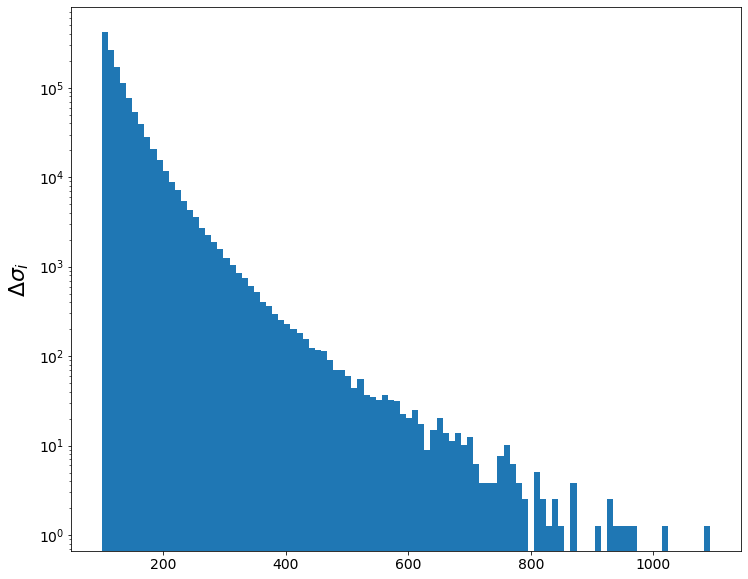

In [14]:
fig = plt.figure( figsize=(12,10) )


plt.hist( df_sel_events['PT'], weights=weights_sigma, bins=100 )
plt.yscale( 'log' )
plt.ylabel(r"$\Delta \sigma_i}$")

5.0
[0.25184 0.25184 0.25184 ... 0.25184 0.25184 0.25184]


Text(0.5, 0, '$p_t$')

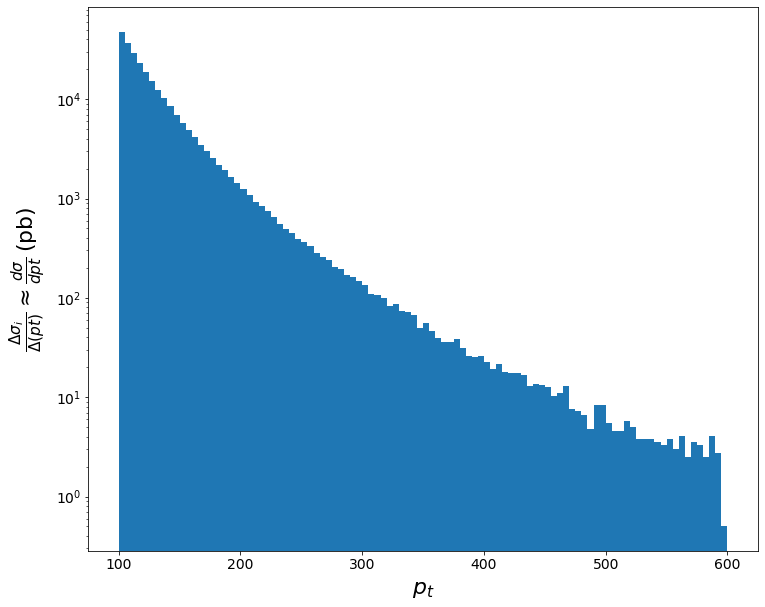

In [15]:
pt_min = 100.
pt_max = 600.
bins = 100
delta_pt = ( ( pt_max - pt_min ) / bins )
print ( delta_pt )

weights_binwidth = weights_sigma / delta_pt
print ( weights_binwidth )

fig = plt.figure( figsize=(12,10) )

# Em df_sel['PT'] poderia entrar aquela variável que eu fiz e acabei por não utilizar, visto que PT já consta no
# dataframe
plt.hist( df_sel_events['PT'], weights=weights_binwidth, bins=bins, range=(pt_min,pt_max) )
plt.yscale( 'log' )
plt.ylabel(r"$\frac{\Delta \sigma_i}{\Delta(pt)} \approx \frac{d\sigma}{dpt} \,(\rm{pb})$" )
plt.xlabel('$p_t$')

0.1
[12.592 12.592 12.592 ... 12.592 12.592 12.592]


Text(0.5, 0, '$|y|$')

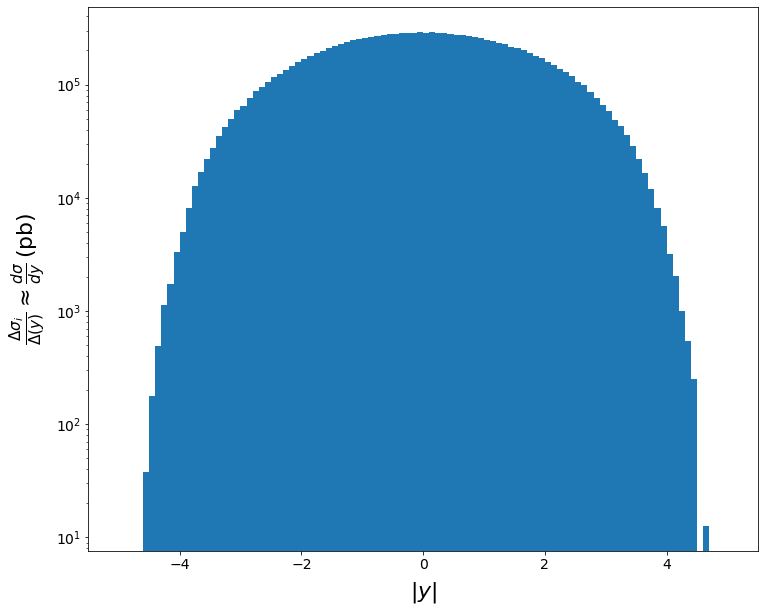

In [16]:
pt_min = -5
pt_max = 5.
bins = 100
delta_pt = ( ( pt_max - pt_min ) / bins )
print ( delta_pt )

weights_binwidth = weights_sigma / delta_pt
print ( weights_binwidth )

fig = plt.figure( figsize=(12,10) )

# Em df_sel['PT'] poderia entrar aquela variável que eu fiz e acabei por não utilizar, visto que PT já consta no
# dataframe
plt.hist( df_sel_events['Rapidity'], weights=weights_binwidth, bins=bins, range=(pt_min,pt_max) )
plt.yscale( 'log' )
plt.ylabel(r"$\frac{\Delta \sigma_i}{\Delta(y)} \approx \frac{d\sigma}{dy} \,(\rm{pb})$" )
plt.xlabel('$|y|$')